In [2]:
import numpy as np
import pandas as pd
import re
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, recall_score, classification_report,confusion_matrix
import glob
import os
import matplotlib.pyplot as plt

In [3]:
train_path = max(glob.glob('./data/train/*.csv'), key=os.path.getctime) 
test_path = max(glob.glob('./data/test/*.csv'), key=os.path.getctime) 
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape)
print(test_df.shape)

(24756, 579)
(4369, 579)


In [3]:
print(train_df.columns.tolist())
# print(test_df.columns[:40])
# test_df.columns == train_df.columns

['reward_tiers', 'min_reward', 'max_reward', 'goal', 'state', 'staff_pick', 'has_video', 'rewards_0', 'rewards_1', 'rewards_2', 'rewards_3', 'rewards_4', 'rewards_5', 'rewards_6', 'rewards_7', 'rewards_8', 'rewards_9', 'rewards_10', 'rewards_11', 'rewards_12', 'rewards_13', 'rewards_14', 'rewards_15', 'rewards_16', 'rewards_17', 'rewards_18', 'rewards_19', 'rewards_20', 'rewards_21', 'rewards_22', 'rewards_23', 'rewards_24', 'rewards_25', 'rewards_26', 'rewards_27', 'rewards_28', 'rewards_29', 'rewards_30', 'rewards_31', 'rewards_32', 'rewards_33', 'rewards_34', 'rewards_35', 'rewards_36', 'rewards_37', 'rewards_38', 'rewards_39', 'rewards_40', 'rewards_41', 'rewards_42', 'rewards_43', 'rewards_44', 'rewards_45', 'rewards_46', 'rewards_47', 'rewards_48', 'rewards_49', 'rewards_50', 'rewards_51', 'rewards_52', 'rewards_53', 'rewards_54', 'rewards_55', 'rewards_56', 'rewards_57', 'rewards_58', 'rewards_59', 'rewards_60', 'rewards_61', 'rewards_62', 'rewards_63', 'rewards_64', 'rewards_65

In [4]:
# features_to_drop = ['rewards', 'deadline', 'launched_at', 'rewards_processed', 'created_at',
# 'description_processed', 'description_story_processed','description_risks_processed',
# 'id', 'name', 'description', 'description_story', 'description_risks', 'video', 'state',
# 'location', 'category']

#features that are dependent on time and the final outcome

X_train, y_train = train_df.drop('state', axis=1), train_df['state']
X_test, y_test = test_df.drop('state', axis=1), test_df['state']

In [5]:
# Combine train and test data set tgt

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [6]:
# Check if dataset is balanced
print(train_df[train_df.state == 1].shape)
print(train_df[train_df.state == 0].shape)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17482, 579)
(7274, 579)
(24756, 578)
(24756,)
(4369, 578)
(4369,)


In [9]:
#Default model
model_xgboost_default = XGBClassifier()

model_xgboost_default.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=[(X_test, y_test)],
                  verbose=True)

xgb_train_default_predict = model_xgboost_default.predict(X_train)
xgb_test_default_predict = model_xgboost_default.predict(X_test)

c:\Users\bandy\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.51529
[1]	validation_0-logloss:0.41470
[2]	validation_0-logloss:0.34874
[3]	validation_0-logloss:0.30429
[4]	validation_0-logloss:0.27352
[5]	validation_0-logloss:0.25144
[6]	validation_0-logloss:0.23480
[7]	validation_0-logloss:0.22210
[8]	validation_0-logloss:0.21294
[9]	validation_0-logloss:0.20595
[10]	validation_0-logloss:0.19899
[11]	validation_0-logloss:0.19367
[12]	validation_0-logloss:0.18984
[13]	validation_0-logloss:0.18694
[14]	validation_0-logloss:0.18262
[15]	validation_0-logloss:0.18110
[16]	validation_0-logloss:0.17962
[17]	validation_0-logloss:0.17764
[18]	validation_0-logloss:0.17648
[19]	validation_0-logloss:0.17516
[20]	validation_0-logloss:0.17425
[21]	validation_0-logloss:0.17276
[22]	validation_0-logloss:0.17260
[23]	validation_0-logloss:0.17142
[24]	validation_0-logloss:0.17056
[25]	validation_0-logloss:0.16955
[26]	validation_0-logloss:0.16865
[27]	validation_0-logloss:0.16893
[28]	validation_0-logloss:0.16891
[29]	validation_0-loglos

**Evaluate Model Performance**

In [11]:
print(confusion_matrix(y_train, xgb_train_default_predict))
print(classification_report(y_train, xgb_train_default_predict))

[[ 6947   327]
 [   98 17384]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7274
           1       0.98      0.99      0.99     17482

    accuracy                           0.98     24756
   macro avg       0.98      0.97      0.98     24756
weighted avg       0.98      0.98      0.98     24756



In [12]:
print(confusion_matrix(y_test, xgb_test_default_predict))
print(classification_report(y_test, xgb_test_default_predict))

[[1082  200]
 [  69 3018]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1282
           1       0.94      0.98      0.96      3087

    accuracy                           0.94      4369
   macro avg       0.94      0.91      0.92      4369
weighted avg       0.94      0.94      0.94      4369



In [14]:
model_xgboost_default.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)>

**Hyperparameter Tuning**

We will use GridSearchCV for hyperparameter tuning.


In [15]:
learning_rate_list = [0.1, 0.3, 0.5]
max_depth_list = [2, 3, 5]
n_estimators_list = [50, 100, 150]
subsample_list = [0.3, 0.5, 0.7]


params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list,
               "subsample": subsample_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

81


{'learning_rate': [0.1, 0.3, 0.5],
 'max_depth': [2, 3, 5],
 'n_estimators': [50, 100, 150],
 'subsample': [0.3, 0.5, 0.7]}

In [16]:
# Custom cross-validation method
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2022)

model_xgboost_tuning = RandomizedSearchCV(estimator= XGBClassifier(),
                                param_distributions = params_dict,
                                cv=cv_method,
                                scoring='roc_auc',
                                verbose=2,
                                random_state=2022)

model_xgboost_tuning.fit(X, y)

c:\Users\bandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 15 folds for each of 81 candidates, totalling 1215 fits
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   3.0s
[CV] END learnin

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=2022),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=No...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [2, 3, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.3, 0.5, 0.7]},
                   random_state=2022, return_train_score=True,
                   scoring='roc_auc', verbose=2)

In [24]:
results_df = pd.DataFrame(model_xgboost_tuning.cv_results_)
results_df = results_df[['rank_test_score','mean_test_score','mean_train_score', 'param_subsample',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
results_df.sort_values(by='rank_test_score', inplace=True)
results_df[:10]

,rank_test_score,mean_test_score,mean_train_score,param_subsample,param_learning_rate,param_max_depth,param_n_estimators
26,1,0.978256,0.996143,0.7,0.1,5,150
35,2,0.977859,0.986828,0.7,0.3,2,150
25,3,0.977640,0.995619,0.5,0.1,5,150
44,4,0.977340,0.994209,0.7,0.3,3,150
41,5,0.977288,0.990436,0.7,0.3,3,100
23,6,0.977186,0.992594,0.7,0.1,5,100
32,7,0.977064,0.983369,0.7,0.3,2,100
34,8,0.977043,0.986449,0.5,0.3,2,150
17,9,0.976933,0.984650,0.7,0.1,3,150
16,10,0.976755,0.984541,0.5,0.1,3,150


## Final Model
Using best parameters from above step

In [7]:
import time
start_time = time.time()
model_xgboost_fin = XGBClassifier(n_estimators= 150, max_depth = 5, learning_rate = 0.1, subsample = 0.7)

model_xgboost_fin.fit(X_train, y_train)
y_pred_test = model_xgboost_fin.predict(X_test)

time_taken = time.time() - start_time
print("Total time taken for the program execution", time_taken) # seconds
print(classification_report(y_test, y_pred_test, digits=5))
print(roc_auc_score(y_test, y_pred_test))

Total time taken for the program execution 39.5569384098053
              precision    recall  f1-score   support

           0    0.83130   0.69189   0.75521      1282
           1    0.88038   0.94169   0.91000      3087

    accuracy                        0.86839      4369
   macro avg    0.85584   0.81679   0.83261      4369
weighted avg    0.86598   0.86839   0.86458      4369

0.8167893188030728


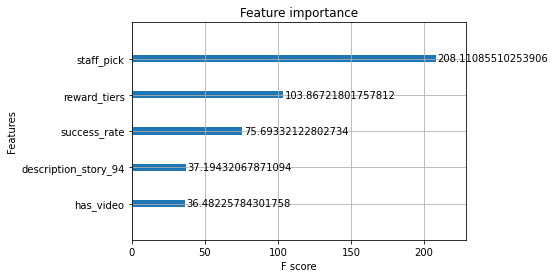

In [8]:
plot_importance(model_xgboost_fin, importance_type = 'gain', max_num_features=5)
plt.show()

In [9]:
var_colums = [c for c in X_train.columns if c not in ['state']]

df_var_imp = pd.DataFrame({"Feature": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_})\
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Feature,Importance
4,staff_pick,0.052972
0,reward_tiers,0.026438
421,success_rate,0.019267
300,description_story_94,0.009467
5,has_video,0.009286
247,description_story_41,0.008643
3,goal,0.008478
353,description_risks_47,0.007171
274,description_story_68,0.006735
211,description_story_5,0.006172


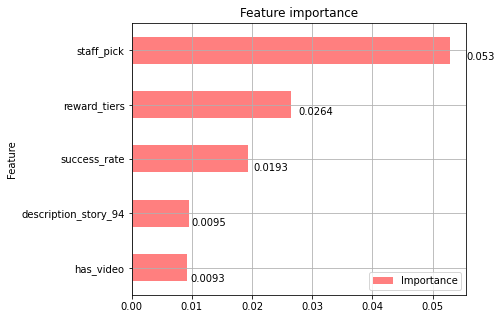

In [10]:
top_5_features = df_var_imp[:5].sort_values('Importance').set_index('Feature')
ax = top_5_features.plot.barh(color='red', alpha=0.5, grid=True, title='Feature importance', figsize=(6, 5))
for p, value in zip(ax.patches, top_5_features['Importance']):
    ax.annotate(round(value, 4), (p.get_width() * 1.05, p.get_y() * 1.02))

In [19]:
import pickle
with open('tfidf_feature_names.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
print(loaded_dict['rewards'])

[(0, '1'), (1, '10'), (2, '100'), (3, '15'), (4, '2'), (5, '2014'), (6, '2015'), (7, '2015 ship'), (8, '2016'), (9, '2016 ship'), (10, '2017'), (11, '2018'), (12, '2019'), (13, '2020'), (14, '2021'), (15, '2022'), (16, '25'), (17, '3'), (18, '5'), (19, '50'), (20, 'album'), (21, 'also'), (22, 'anywhere'), (23, 'anywhere world'), (24, 'anywhere world pledge'), (25, 'aug'), (26, 'book'), (27, 'cd'), (28, 'choice'), (29, 'copy'), (30, 'credit'), (31, 'dec'), (32, 'delivery'), (33, 'delivery aug'), (34, 'delivery dec'), (35, 'delivery jun'), (36, 'delivery nov'), (37, 'delivery oct'), (38, 'delivery sep'), (39, 'digital'), (40, 'download'), (41, 'early'), (42, 'edition'), (43, 'estimated'), (44, 'estimated delivery'), (45, 'estimated delivery aug'), (46, 'estimated delivery dec'), (47, 'estimated delivery jun'), (48, 'estimated delivery nov'), (49, 'estimated delivery oct'), (50, 'estimated delivery sep'), (51, 'exclusive'), (52, 'film'), (53, 'free'), (54, 'get'), (55, 'includes'), (56, '